# 4-7. ÌîÑÎ°úÏ†ùÌä∏: Î©ãÏßÑ ÏûëÏÇ¨Í∞Ä ÎßåÎì§Í∏∞

### Step 1. Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
Ïù¥ÎØ∏ Ïã§Ïäµ(1) Îç∞Ïù¥ÌÑ∞ Îã§Îì¨Í∏∞ÏóêÏÑú Cloud shellÏóê Ïã¨Î≥ºÎ¶≠ ÎßÅÌÅ¨Î°ú ~/aiffel/lyricist/dataÎ•º ÏÉùÏÑ±ÌïòÏÖ®Îã§Î©¥, ~/aiffel/lyricist/data/lyricsÏóê Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏäµÎãàÎã§.


### Step 2. Îç∞Ïù¥ÌÑ∞ ÏùΩÏñ¥Ïò§Í∏∞
glob Î™®ÎìàÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ ÌååÏùºÏùÑ ÏùΩÏñ¥Ïò§Îäî ÏûëÏóÖÏùÑ ÌïòÍ∏∞Í∞Ä ÏïÑÏ£º Ïö©Ïù¥Ìï¥Ïöî. glob Î•º ÌôúÏö©ÌïòÏó¨ Î™®Îì† txt ÌååÏùºÏùÑ ÏùΩÏñ¥Ïò® ÌõÑ, raw_corpus Î¶¨Ïä§Ìä∏Ïóê Î¨∏Ïû• Îã®ÏúÑÎ°ú Ï†ÄÏû•ÌïòÎèÑÎ°ù Ìï†Í≤åÏöî!



In [1]:
import glob
import os, re
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np 

tf.config.list_physical_devices('GPU')

file_path = os.getenv('HOME')+'/aiffel/lyricist/data/lyrics/*'

txt_list = glob.glob(file_path)

raw_corpus = []

# Ïó¨Îü¨Í∞úÏùò txt ÌååÏùºÏùÑ Î™®Îëê ÏùΩÏñ¥ÏÑú raw_corpus Ïóê Îã¥ÏäµÎãàÎã§.
for txt_file in txt_list:
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)

print("Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", len(raw_corpus))
print("Examples:\n", raw_corpus[:3])
print("\nExample 2:", raw_corpus[11:15])

Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 187088
Examples:
 ['[Hook]', "I've been down so long, it look like up to me", 'They look up to me']

Example 2: ["Look like you hidin' your problems", 'Really you never was solid', 'No, you can\'t "son" me', "You won't never get to run me"]


### Step 3. Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú
ÏïûÏÑú Î∞∞Ïö¥ ÌÖåÌÅ¨ÎãâÎì§ÏùÑ ÌôúÏö©Ìï¥ Î¨∏Ïû• ÏÉùÏÑ±Ïóê Ï†ÅÌï©Ìïú Î™®ÏñëÏÉàÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÏ†úÌïòÏÑ∏Ïöî!

preprocess_sentence() Ìï®ÏàòÎ•º ÎßåÎì† Í≤ÉÏùÑ Í∏∞ÏñµÌïòÏãúÏ£†? Ïù¥Î•º ÌôúÏö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÏ†úÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

Ï∂îÍ∞ÄÎ°ú ÏßÄÎÇòÏπòÍ≤å Í∏¥ Î¨∏Ïû•ÏùÄ Îã§Î•∏ Îç∞Ïù¥ÌÑ∞Îì§Ïù¥ Í≥ºÎèÑÌïú PaddingÏùÑ Í∞ñÍ≤å ÌïòÎØÄÎ°ú Ï†úÍ±∞Ìï©ÎãàÎã§. ÎÑàÎ¨¥ Í∏¥ Î¨∏Ïû•ÏùÄ ÎÖ∏Îûò Í∞ÄÏÇ¨ ÏûëÏÇ¨ÌïòÍ∏∞Ïóê Ïñ¥Ïö∏Î¶¨ÏßÄ ÏïäÏùÑ ÏàòÎèÑ ÏûàÍ≤†Ï£†.
Í∑∏ÎûòÏÑú Ïù¥Î≤àÏóêÎäî Î¨∏Ïû•ÏùÑ ÌÜ†ÌÅ∞Ìôî ÌñàÏùÑ Îïå ÌÜ†ÌÅ∞Ïùò Í∞úÏàòÍ∞Ä 15Í∞úÎ•º ÎÑòÏñ¥Í∞ÄÎäî Î¨∏Ïû•ÏùÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï†úÏô∏ÌïòÍ∏∞ Î•º Í∂åÌï©ÎãàÎã§.

In [2]:
for idx, sentence in enumerate(raw_corpus):
    if len(sentence) == 0: continue   # Í∏∏Ïù¥Í∞Ä 0Ïù∏ Î¨∏Ïû•ÏùÄ Í±¥ÎÑàÎúÅÎãàÎã§.
    if sentence[-1] == ":": continue  # Î¨∏Ïû•Ïùò ÎÅùÏù¥ : Ïù∏ Î¨∏Ïû•ÏùÄ Í±¥ÎÑàÎúÅÎãàÎã§.

    if idx > 15: break   # ÏùºÎã® Î¨∏Ïû• 15Í∞úÎßå ÌôïÏù∏Ìï¥ Î≥º Í≤ÅÎãàÎã§.
        
    print(sentence)

[Hook]
I've been down so long, it look like up to me
They look up to me
I got fake people showin' fake love to me
Straight up to my face, straight up to my face
I've been down so long, it look like up to me
They look up to me
I got fake people showin' fake love to me
Straight up to my face, straight up to my face [Verse 1]
Somethin' ain't right when we talkin'
Somethin' ain't right when we talkin'
Look like you hidin' your problems
Really you never was solid
No, you can't "son" me
You won't never get to run me
Just when shit look out of reach


In [3]:
# ÏûÖÎ†•Îêú Î¨∏Ïû•ÏùÑ
#     1. ÏÜåÎ¨∏ÏûêÎ°ú Î∞îÍæ∏Í≥†, ÏñëÏ™Ω Í≥µÎ∞±ÏùÑ ÏßÄÏõÅÎãàÎã§
#     2. ÌäπÏàòÎ¨∏Ïûê ÏñëÏ™ΩÏóê Í≥µÎ∞±ÏùÑ ÎÑ£Í≥†
#     3. Ïó¨Îü¨Í∞úÏùò Í≥µÎ∞±ÏùÄ ÌïòÎÇòÏùò Í≥µÎ∞±ÏúºÎ°ú Î∞îÍøâÎãàÎã§
#     4. a-zA-Z?.!,¬øÍ∞Ä ÏïÑÎãå Î™®Îì† Î¨∏ÏûêÎ•º ÌïòÎÇòÏùò Í≥µÎ∞±ÏúºÎ°ú Î∞îÍøâÎãàÎã§
#     5. Îã§Ïãú ÏñëÏ™Ω Í≥µÎ∞±ÏùÑ ÏßÄÏõÅÎãàÎã§
#     6. Î¨∏Ïû• ÏãúÏûëÏóêÎäî <start>, ÎÅùÏóêÎäî <end>Î•º Ï∂îÍ∞ÄÌï©ÎãàÎã§
# Ïù¥ ÏàúÏÑúÎ°ú Ï≤òÎ¶¨Ìï¥Ï£ºÎ©¥ Î¨∏Ï†úÍ∞Ä ÎêòÎäî ÏÉÅÌô©ÏùÑ Î∞©ÏßÄÌï† Ïàò ÏûàÍ≤†ÎÑ§Ïöî!
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 1
    sentence = re.sub(r"([?.!,¬ø])", r" \1 ", sentence) # 2
    sentence = re.sub(r'[" "]+', " ", sentence) # 3
    sentence = re.sub(r"[^a-zA-Z?.!,¬ø]+", " ", sentence) # 4
    sentence = sentence.strip() # 5
    sentence = '<start> ' + sentence + ' <end>' # 6
    return sentence

# Ïù¥ Î¨∏Ïû•Ïù¥ Ïñ¥ÎñªÍ≤å ÌïÑÌÑ∞ÎßÅÎêòÎäîÏßÄ ÌôïÏù∏Ìï¥ Î≥¥ÏÑ∏Ïöî.
print(preprocess_sentence("This @_is ;;;sample        sentence."))

<start> this is sample sentence . <end>


ÏßúÏûî, ÏßÄÏ†ÄÎ∂ÑÌïú Î¨∏Ïû•ÏùÑ ÎÑ£Ïñ¥ÎèÑ ÏòàÏÅòÍ≤å Î≥ÄÌôòÌï¥ Ï£ºÎäî Ï†ïÏ†ú Ìï®ÏàòÍ∞Ä ÏôÑÏÑ±ÎêòÏóàÏäµÎãàÎã§! Î≥¥ÎÑàÏä§Î°ú Ïù¥Ï†Ñ Ïä§ÌÖùÏóêÏÑú Î∞∞Ïö¥ <start> <end> ÎèÑ Ï∂îÍ∞ÄÌñàÏäµÎãàÎã§.

Í∑∏Îü¨Î©¥ Ïö∞Î¶¨Í∞Ä Íµ¨Ï∂ïÌï¥Ïïº Ìï† Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Ïñ¥Îñ§ Î™®ÏñëÏù¥ Îê†ÍπåÏöî?

Ïù¥Ï†Ñ Ïä§ÌÖùÏóêÏÑú Î¥§Îçò ÏòàÎ•º Îñ†Ïò¨Î†§ Î¥ÖÏãúÎã§.
    
    
// Ïñ∏Ïñ¥ Î™®Îç∏Ïùò ÏûÖÎ†• Î¨∏Ïû• :  <start> ÎÇòÎäî Î∞•ÏùÑ Î®πÏóàÎã§
// Ïñ∏Ïñ¥ Î™®Îç∏Ïùò Ï∂úÎ†• Î¨∏Ïû• : ÎÇòÎäî Î∞•ÏùÑ Î®πÏóàÎã§ <end>

In [4]:
# Ïó¨Í∏∞Ïóê Ï†ïÏ†úÎêú Î¨∏Ïû•ÏùÑ Î™®ÏùÑÍ≤ÅÎãàÎã§
corpus = []

for sentence in raw_corpus:
    # Ïö∞Î¶¨Í∞Ä ÏõêÌïòÏßÄ ÏïäÎäî Î¨∏Ïû•ÏùÄ Í±¥ÎÑàÎúÅÎãàÎã§
    if len(sentence) == 0: continue
    if sentence[-1] == ":": continue
    
    # Ï†ïÏ†úÎ•º ÌïòÍ≥† Îã¥ÏïÑÏ£ºÏÑ∏Ïöî
    preprocessed_sentence = preprocess_sentence(sentence)
    corpus.append(preprocessed_sentence)
        
# Ï†ïÏ†úÎêú Í≤∞Í≥ºÎ•º 10Í∞úÎßå ÌôïÏù∏Ìï¥Î≥¥Ï£†
corpus[:10]

['<start> hook <end>',
 '<start> i ve been down so long , it look like up to me <end>',
 '<start> they look up to me <end>',
 '<start> i got fake people showin fake love to me <end>',
 '<start> straight up to my face , straight up to my face <end>',
 '<start> i ve been down so long , it look like up to me <end>',
 '<start> they look up to me <end>',
 '<start> i got fake people showin fake love to me <end>',
 '<start> straight up to my face , straight up to my face verse <end>',
 '<start> somethin ain t right when we talkin <end>']

### Step 4. ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨ÌïòÏÑ∏Ïöî!

tokenize() Ìï®ÏàòÎ°ú Îç∞Ïù¥ÌÑ∞Î•º TensorÎ°ú Î≥ÄÌôòÌïú ÌõÑ, sklearn Î™®ÎìàÏùò train_test_split() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§. Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞Îäî 12,000 Ïù¥ÏÉÅ ÏúºÎ°ú ÏÑ§Ï†ïÌïòÏÑ∏Ïöî! Ï¥ù Îç∞Ïù¥ÌÑ∞Ïùò 20% Î•º ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÏÇ¨Ïö©Ìï¥ Ï£ºÏÑ∏Ïöî!


ÌÖêÏÑúÌîåÎ°úÏö∞Îäî ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨Î•º ÏúÑÌïú Ïó¨Îü¨ Í∞ÄÏßÄ Î™®ÎìàÏùÑ Ï†úÍ≥µÌïòÎäîÎç∞, Ïö∞Î¶¨ÎèÑ Í∑∏ Î™®ÎìàÏùÑ Ïã≠Î∂Ñ ÌôúÏö©Ìï† Í≤ÅÎãàÎã§! ÏïÑÎûòÏóêÏÑú ÌôúÏö©ÌïòÍ≤å Îê† tf.keras.preprocessing.text.Tokenizer Ìå®ÌÇ§ÏßÄÎäî Ï†ïÏ†úÎêú Îç∞Ïù¥ÌÑ∞Î•º ÌÜ†ÌÅ∞ÌôîÌïòÍ≥†, Îã®Ïñ¥ ÏÇ¨Ï†Ñ(vocabulary ÎòêÎäî dictionaryÎùºÍ≥† Ïπ≠Ìï®)ÏùÑ ÎßåÎì§Ïñ¥Ï£ºÎ©∞, Îç∞Ïù¥ÌÑ∞Î•º Ïà´ÏûêÎ°ú Î≥ÄÌôòÍπåÏßÄ Ìïú Î∞©Ïóê Ìï¥Ï§çÎãàÎã§. Ïù¥ Í≥ºÏ†ïÏùÑ Î≤°ÌÑ∞Ìôî(vectorize) Îùº ÌïòÎ©∞, Ïà´ÏûêÎ°ú Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Î•º ÌÖêÏÑú(tensor) ÎùºÍ≥† Ïπ≠Ìï©ÎãàÎã§. Ïö∞Î¶¨Í∞Ä ÏÇ¨Ïö©ÌïòÎäî ÌÖêÏÑúÌîåÎ°úÏö∞Î°ú ÎßåÎì† Î™®Îç∏Ïùò ÏûÖÏ∂úÎ†• Îç∞Ïù¥ÌÑ∞Îäî Ïã§Ï†úÎ°úÎäî Î™®Îëê Ïù¥Îü∞ ÌÖêÏÑúÎ°ú Î≥ÄÌôòÎêòÏñ¥ Ï≤òÎ¶¨ÎêòÎäî Í≤ÉÏûÖÎãàÎã§.

We will create a tokenizer (vectroziation) function

In [5]:
# ÌÜ†ÌÅ∞Ìôî Ìï† Îïå ÌÖêÏÑúÌîåÎ°úÏö∞Ïùò TokenizerÏôÄ pad_sequencesÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§
# Îçî Ïûò ÏïåÍ∏∞ ÏúÑÌï¥ ÏïÑÎûò Î¨∏ÏÑúÎì§ÏùÑ Ï∞∏Í≥†ÌïòÎ©¥ Ï¢ãÏäµÎãàÎã§
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
def tokenize(corpus):
    # 7000Îã®Ïñ¥Î•º Í∏∞ÏñµÌï† Ïàò ÏûàÎäî tokenizerÎ•º ÎßåÎì§Í≤ÅÎãàÎã§
    # Ïö∞Î¶¨Îäî Ïù¥ÎØ∏ Î¨∏Ïû•ÏùÑ Ï†ïÏ†úÌñàÏúºÎãà filtersÍ∞Ä ÌïÑÏöîÏóÜÏñ¥Ïöî
    # 7000Îã®Ïñ¥Ïóê Ìè¨Ìï®ÎêòÏßÄ Î™ªÌïú Îã®Ïñ¥Îäî '<unk>'Î°ú Î∞îÍøÄÍ±∞ÏóêÏöî
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=7000, 
        filters=' ',
        oov_token="<unk>"
    )
    # corpusÎ•º Ïù¥Ïö©Ìï¥ tokenizer ÎÇ¥Î∂ÄÏùò Îã®Ïñ¥Ïû•ÏùÑ ÏôÑÏÑ±Ìï©ÎãàÎã§
    tokenizer.fit_on_texts(corpus)
    # Ï§ÄÎπÑÌïú tokenizerÎ•º Ïù¥Ïö©Ìï¥ corpusÎ•º TensorÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§
    tensor = tokenizer.texts_to_sequences(corpus)   
    # ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïùò ÏãúÌÄÄÏä§ Í∏∏Ïù¥Î•º ÏùºÏ†ïÌïòÍ≤å ÎßûÏ∂∞Ï§çÎãàÎã§
    # ÎßåÏïΩ ÏãúÌÄÄÏä§Í∞Ä ÏßßÎã§Î©¥ Î¨∏Ïû• Îí§Ïóê Ìå®Îî©ÏùÑ Î∂ôÏó¨ Í∏∏Ïù¥Î•º ÎßûÏ∂∞Ï§çÎãàÎã§.
    # Î¨∏Ïû• ÏïûÏóê Ìå®Îî©ÏùÑ Î∂ôÏó¨ Í∏∏Ïù¥Î•º ÎßûÏ∂îÍ≥† Ïã∂Îã§Î©¥ padding='pre'Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')  
    
    print(tensor,tokenizer)
    return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)

[[   2  953    3 ...    0    0    0]
 [   2    5   91 ...    0    0    0]
 [   2   45  134 ...    0    0    0]
 ...
 [   2  211    3 ...    0    0    0]
 [   2  399    9 ...    0    0    0]
 [   2    9 1294 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7f8f6dfa04d0>


ÏÉùÏÑ±Îêú ÌÖêÏÑú Îç∞Ïù¥ÌÑ∞Î•º 3Î≤àÏß∏ Ìñâ, 10Î≤àÏß∏ Ïó¥ÍπåÏßÄÎßå Ï∂úÎ†•Ìï¥ Î¥ÖÏãúÎã§.

In [6]:
print(tensor[:3, :10])

[[  2 953   3   0   0   0   0   0   0   0]
 [  2   5  91 106  60  30 161   4  11 134]
 [  2  45 134  29  10  12   3   0   0   0]]


ÌÖêÏÑú Îç∞Ïù¥ÌÑ∞Îäî Î™®Îëê Ï†ïÏàòÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÏäµÎãàÎã§. Ïù¥ Ïà´ÏûêÎäî Îã§Î¶Ñ ÏïÑÎãàÎùº, tokenizerÏóê Íµ¨Ï∂ïÎêú Îã®Ïñ¥ ÏÇ¨Ï†ÑÏùò Ïù∏Îç±Ïä§ÏûÖÎãàÎã§. Îã®Ïñ¥ ÏÇ¨Ï†ÑÏù¥ Ïñ¥ÎñªÍ≤å Íµ¨Ï∂ïÎêòÏóàÎäîÏßÄ ÏïÑÎûòÏôÄ Í∞ôÏù¥ ÌôïÏù∏Ìï¥ Î¥ÖÏãúÎã§.

In [7]:
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 10: break

1 : <unk>
2 : <start>
3 : <end>
4 : ,
5 : i
6 : the
7 : you
8 : and
9 : a
10 : to


In [8]:
# tensorÏóêÏÑú ÎßàÏßÄÎßâ ÌÜ†ÌÅ∞ÏùÑ ÏûòÎùºÎÇ¥ÏÑú ÏÜåÏä§ Î¨∏Ïû•ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§
# ÎßàÏßÄÎßâ ÌÜ†ÌÅ∞ÏùÄ <end>Í∞Ä ÏïÑÎãàÎùº <pad>Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏäµÎãàÎã§.
src_input = tensor[:, :-1]  
# tensorÏóêÏÑú <start>Î•º ÏûòÎùºÎÇ¥ÏÑú ÌÉÄÍ≤ü Î¨∏Ïû•ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
tgt_input = tensor[:, 1:]    

print(src_input[0])
print(tgt_input[0])

[  2 953   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

corpus ÎÇ¥Ïùò Ï≤´ Î≤àÏß∏ Î¨∏Ïû•Ïóê ÎåÄÌï¥ ÏÉùÏÑ±Îêú ÏÜåÏä§ÏôÄ ÌÉÄÍ≤ü Î¨∏Ïû•ÏùÑ ÌôïÏù∏Ìï¥ Î≥¥ÏïòÏäµÎãàÎã§. ÏòàÏÉÅÎåÄÎ°ú ÏÜåÏä§Îäî 2()ÏóêÏÑú ÏãúÏûëÌï¥ÏÑú 3()ÏúºÎ°ú ÎÅùÎÇú ÌõÑ 0()Î°ú Ï±ÑÏõåÏ†∏ ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå ÌÉÄÍ≤üÏùÄ 2Î°ú ÏãúÏûëÌïòÏßÄ ÏïäÍ≥† ÏÜåÏä§Î•º ÏôºÏ™ΩÏúºÎ°ú Ìïú Ïπ∏ ÏãúÌîÑÌä∏ Ìïú ÌòïÌÉúÎ•º Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§.
ÎßàÏßÄÎßâÏúºÎ°ú Ïö∞Î¶¨Îäî Îç∞Ïù¥ÌÑ∞ÏÖã Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï† Í≤ÉÏûÖÎãàÎã§. Í∑∏ÎèôÏïà Ïö∞Î¶¨Îäî model.fit(x_train, y_train, ...) ÌòïÌÉúÎ°ú Numpy Array Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÉùÏÑ±ÌïòÏó¨ modelÏóê Ï†úÍ≥µÌïòÎäî ÌòïÌÉúÏùò ÌïôÏäµÏùÑ ÎßéÏù¥ ÏßÑÌñâÌï¥ ÏôîÏäµÎãàÎã§. Í∑∏Îü¨ÎÇò ÌÖêÏÑúÌîåÎ°úÏö∞Î•º ÌôúÏö©Ìï† Í≤ΩÏö∞ ÌÖêÏÑúÎ°ú ÏÉùÏÑ±Îêú Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ tf.data.DatasetÍ∞ùÏ≤¥Î•º ÏÉùÏÑ±ÌïòÎäî Î∞©Î≤ïÏùÑ ÌùîÌûà ÏÇ¨Ïö©Ìï©ÎãàÎã§. tf.data.DatasetÍ∞ùÏ≤¥Îäî ÌÖêÏÑúÌîåÎ°úÏö∞ÏóêÏÑú ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞ Îç∞Ïù¥ÌÑ∞ ÏûÖÎ†• ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÌÜµÌïú ÏÜçÎèÑ Í∞úÏÑ† Î∞è Í∞ÅÏ¢Ö Ìé∏Ïùò Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌïòÎØÄÎ°ú Íº≠ ÏÇ¨Ïö©Î≤ïÏùÑ ÏïåÏïÑ ÎëêÏãúÍ∏∞Î•º Í∂åÌï©ÎãàÎã§. Ïö∞Î¶¨Îäî Ïù¥ÎØ∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌÖêÏÑú ÌòïÌÉúÎ°ú ÏÉùÏÑ±Ìï¥ ÎëêÏóàÏúºÎØÄÎ°ú, tf.data.Dataset.from_tensor_slices() Î©îÏÜåÎìúÎ•º Ïù¥Ïö©Ìï¥ tf.data.DatasetÍ∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï† Í≤ÉÏûÖÎãàÎã§.

In [9]:
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE

 # tokenizerÍ∞Ä Íµ¨Ï∂ïÌïú Îã®Ïñ¥ÏÇ¨Ï†Ñ ÎÇ¥ 7000Í∞úÏôÄ, Ïó¨Í∏∞ Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùÄ 0:<pad>Î•º Ìè¨Ìï®ÌïòÏó¨ 7001Í∞ú
VOCAB_SIZE = tokenizer.num_words + 1   

# Ï§ÄÎπÑÌïú Îç∞Ïù¥ÌÑ∞ ÏÜåÏä§Î°úÎ∂ÄÌÑ∞ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎßåÎì≠ÎãàÎã§
# Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ÏÑúÎäî ÏïÑÎûò Î¨∏ÏÑúÎ•º Ï∞∏Í≥†ÌïòÏÑ∏Ïöî
# ÏûêÏÑ∏Ìûà ÏïåÏïÑÎëòÏàòÎ°ù ÎèÑÏõÄÏù¥ ÎßéÏù¥ ÎêòÎäî Ï§ëÏöîÌïú Î¨∏ÏÑúÏûÖÎãàÎã§
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset
dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset shapes: ((256, 346), (256, 346)), types: (tf.int32, tf.int32)>

Ïù¥Î≤à Ïä§ÌÖùÏóêÏÑú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌï¥ Í±∞Ï≥ê Ïò® Í≥ºÏ†ïÏùÑ Ïûò Í∏∞ÏñµÌï¥ ÎëêÏãúÍ∏∏ Î∞îÎûçÎãàÎã§.
Ï†ïÍ∑úÌëúÌòÑÏãùÏùÑ Ïù¥Ïö©Ìïú corpus ÏÉùÏÑ± tf.keras.preprocessing.text.TokenizerÎ•º Ïù¥Ïö©Ìï¥ corpusÎ•º ÌÖêÏÑúÎ°ú Î≥ÄÌôò tf.data.Dataset.from_tensor_slices()Î•º Ïù¥Ïö©Ìï¥ corpus ÌÖêÏÑúÎ•º tf.data.DatasetÍ∞ùÏ≤¥Î°ú Î≥ÄÌôò datasetÏùÑ ÏñªÏùåÏúºÎ°úÏç® Îç∞Ïù¥ÌÑ∞ Îã§Îì¨Í∏∞ Í≥ºÏ†ïÏùÄ ÎÅùÎÇ¨ÏäµÎãàÎã§. tf.data.DatasetÏóêÏÑú Ï†úÍ≥µÌïòÎäî shuffle(), batch() Îì± Îã§ÏñëÌïú Îç∞Ïù¥ÌÑ∞ÏÖã Í¥ÄÎ†® Í∏∞Îä•ÏùÑ ÏÜêÏâΩÍ≤å Ïù¥Ïö©Ìï† Ïàò ÏûàÍ≤å ÎêòÏóàÍµ∞Ïöî.


Ïù¥ Î™®Îì† ÏùºÎ†®Ïùò Í≥ºÏ†ïÏùÑ ÌÖêÏÑúÌîåÎ°úÏö∞ÏóêÏÑúÏùò Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Îùº Ïπ≠Ìï©ÎãàÎã§!

#### Step 5. Ïù∏Í≥µÏßÄÎä• ÎßåÎì§Í∏∞
Î™®Îç∏Ïùò Embedding SizeÏôÄ Hidden SizeÎ•º Ï°∞Ï†àÌïòÎ©∞ 10 Epoch ÏïàÏóê val_loss Í∞íÏùÑ 2.2 ÏàòÏ§ÄÏúºÎ°ú Ï§ÑÏùº Ïàò ÏûàÎäî Î™®Îç∏ÏùÑ ÏÑ§Í≥ÑÌïòÏÑ∏Ïöî! (LossÎäî ÏïÑÎûò Ï†úÏãúÎêú Loss Ìï®ÏàòÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©!)

Í∑∏Î¶¨Í≥† Î©ãÏßÑ Î™®Îç∏Ïù¥ ÏÉùÏÑ±Ìïú Í∞ÄÏÇ¨ Ìïú Ï§ÑÏùÑ Ï†úÏ∂úÌïòÏãúÍ∏∏ Î∞îÎûçÎãàÎã§!

#### Ïù∏Í≥µÏßÄÎä• ÌïôÏäµÏãúÌÇ§Í∏∞


Ïö∞Î¶¨Í∞Ä Ïù∏Í≥µÏßÄÎä•Ïù¥ÎùºÍ≥† Î∂ÄÎ•¥Îäî Í≤ÉÏùÄ Ïù∏Í≥µÏã†Í≤ΩÎßùÏù¥Ïûê Îî•Îü¨Îãù ÎÑ§Ìä∏ÏõåÌÅ¨Ïù¥Ïûê Ïù¥Î≤à ÏΩîÏä§ÏóêÏÑ† ÏàúÌôòÏã†Í≤ΩÎßùÏù¥Í∏∞ÎèÑ ÌïòÍ≥†...... ÎÑàÎ¨¥ ÎßéÏùÄ Ïù¥Î¶ÑÏù¥ Í∞ôÏùÄ ÏùòÎØ∏Î•º Îã¥Í≥† ÏûàÏäµÎãàÎã§. Îî∞ÎùºÏÑú ÏßÄÍ∏àÎ∂ÄÌÑ∞ Ïö∞Î¶¨Í∞Ä ÎßåÎì§Í≥†Ïûê ÌïòÎäî Ïù∏Í≥µÏßÄÎä•ÏùÑ Î™®Îç∏(model)Ïù¥ÎùºÍ≥† Ïπ≠ÌïòÍ≤†ÏäµÎãàÎã§. Ïã§Ï†úÎ°úÎèÑ Îã§Îì§ Î™®Îç∏Ïù¥ÎùºÍ≥† ÌïúÎãµÎãàÎã§.

Ïö∞Î¶¨Í∞Ä ÎßåÎì§ Î™®Îç∏Ïùò Íµ¨Ï°∞ÎèÑÎäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

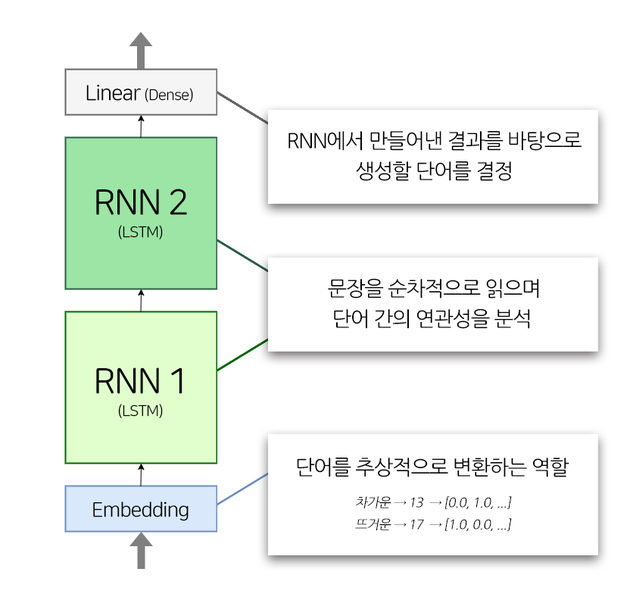

Ïö∞Î¶¨Í∞Ä ÎßåÎì§ Î™®Îç∏ÏùÄ tf.keras.ModelÏùÑ SubclassingÌïòÎäî Î∞©ÏãùÏúºÎ°ú ÎßåÎì§ Í≤ÉÏûÖÎãàÎã§. ÏúÑ Í∑∏Î¶ºÏóêÏÑú ÏÑ§Î™ÖÌïú Í≤ÉÏ≤òÎüº Ïö∞Î¶¨Í∞Ä ÎßåÎì§ Î™®Îç∏ÏóêÎäî 1Í∞úÏùò Embedding Î†àÏù¥Ïñ¥, 2Í∞úÏùò LSTM Î†àÏù¥Ïñ¥, 1Í∞úÏùò Dense Î†àÏù¥Ïñ¥Î°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
Í∞Å Î†àÏù¥Ïñ¥Ïùò Í∏∞Îä•ÏùÑ ÌôïÏã§Ìûà Ïù¥Ìï¥ÌïòÎäî Í≤ÉÏùÄ ÎÇòÏ§ëÏóê ÌïòÍ≥†, ÏßÄÍ∏àÏùÄ Íµ¨Ï°∞ÎèÑÏóê ÏÑ§Î™ÖÎêú Ï†ïÎèÑÏùò Í∞ÑÎã®Ìïú Ïù¥Ìï¥Îßå Í∞ÄÏßÄÍ≥† Í∞ëÏãúÎã§.

In [10]:
# split the data into train, test, and validation set

enc_train, enc_val, dec_train, dec_val = train_test_split(src_input, tgt_input, test_size = 0.25, random_state = 30)

In [11]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out
    
embedding_size = 32
hidden_size = 32
model = Sequential()
model.add(Bidirectional(LSTM(5)))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())

model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)
# why (tokenizer.num_words + 1)??

ÌÖçÏä§Ìä∏ Î∂ÑÎ•ò Î™®Îç∏ÏùÑ Îã§Î£®Ïñ¥ Î≥¥ÏÖ®Îã§Î©¥ Embedding Î†àÏù¥Ïñ¥Ïùò Ïó≠Ìï†Ïóê ÎåÄÌï¥ÏÑúÎäî ÎÇØÏÑ§ÏßÄ ÏïäÏùÑ Í≤ÉÏûÖÎãàÎã§. Ïö∞Î¶¨ ÏûÖÎ†• ÌÖêÏÑúÏóêÎäî Îã®Ïñ¥ ÏÇ¨Ï†ÑÏùò Ïù∏Îç±Ïä§Í∞Ä Îì§Ïñ¥ ÏûàÏäµÎãàÎã§. Embedding Î†àÏù¥Ïñ¥Îäî Ïù¥ Ïù∏Îç±Ïä§ Í∞íÏùÑ Ìï¥Îãπ Ïù∏Îç±Ïä§ Î≤àÏß∏Ïùò ÏõåÎìú Î≤°ÌÑ∞Î°ú Î∞îÍøî Ï§çÎãàÎã§. Ïù¥ ÏõåÎìú Î≤°ÌÑ∞Îäî ÏùòÎØ∏ Î≤°ÌÑ∞ Í≥µÍ∞ÑÏóêÏÑú Îã®Ïñ¥Ïùò Ï∂îÏÉÅÏ†Å ÌëúÌòÑ(representation)ÏúºÎ°ú ÏÇ¨Ïö©Îê©ÎãàÎã§.

ÏúÑ ÏΩîÎìúÏóêÏÑú embedding_size Îäî ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò, Ï¶â Îã®Ïñ¥Í∞Ä Ï∂îÏÉÅÏ†ÅÏúºÎ°ú ÌëúÌòÑÎêòÎäî ÌÅ¨Í∏∞ÏûÖÎãàÎã§. ÎßåÏïΩ Í∑∏ ÌÅ¨Í∏∞Í∞Ä 2ÎùºÎ©¥ ÏòàÎ•º Îì§Ïñ¥

 - Ï∞®Í∞ëÎã§: [0.0, 1.0]
 - Îú®Í≤ÅÎã§: [1.0, 0.0]
 - ÎØ∏ÏßÄÍ∑ºÌïòÎã§: [0.5, 0.5]
 

 Ï†ïÎèÑÏùò Íµ¨Î∂ÑÏù¥ Í∞ÄÎä•ÌïòÍ≤†Íµ∞Ïöî. Í∞íÏù¥ Ïª§ÏßàÏàòÎ°ù Îã®Ïñ¥Ïùò Ï∂îÏÉÅÏ†ÅÏù∏ ÌäπÏßïÎì§ÏùÑ Îçî Ïû°ÏïÑÎÇº Ïàò ÏûàÏßÄÎßå, Í∑∏ÎßåÌÅº Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï£ºÏñ¥ÏßÄÏßÄ ÏïäÏúºÎ©¥ Ïò§ÌûàÎ†§ ÌòºÎûÄÎßåÏùÑ ÏïºÍ∏∞Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Î≤à Ïã§ÏäµÏóêÏÑúÎäî 256Ïù¥ Ï†ÅÎãπÌï¥ Î≥¥Ïù¥ÎÑ§Ïöî.

LSTM Î†àÏù¥Ïñ¥Ïùò hidden state Ïùò Ï∞®ÏõêÏàòÏù∏ hidden_size ÎèÑ Í∞ôÏùÄ Îß•ÎùΩÏûÖÎãàÎã§. hidden_size Îäî Î™®Îç∏Ïóê ÏñºÎßàÎÇò ÎßéÏùÄ ÏùºÍæºÏùÑ Îëò Í≤ÉÏù∏Í∞Ä? Î°ú Ïù¥Ìï¥Ìï¥ÎèÑ ÌÅ¨Í≤å ÏóáÎÇòÍ∞ÄÏßÄ ÏïäÏäµÎãàÎã§. Í∑∏ ÏùºÍæºÎì§ÏùÄ Î™®Îëê Í∞ôÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Í≥† Í∞ÅÏûêÏùò ÏÉùÍ∞ÅÏùÑ Í∞ÄÏßÄÎäîÎç∞, Ïó≠Ïãú Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï£ºÏñ¥ÏßÄÎ©¥ Ïò¨Î∞îÎ•∏ Í≤∞Ï†ïÏùÑ ÎÇ¥Î¶¨Í≤†ÏßÄÎßå Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ Î∞∞Í∞Ä ÏÇ∞ÏúºÎ°ú Í∞à Îøê ÏûÖÎãàÎã§. Ïù¥Î≤à Ïã§ÏäµÏóêÎäî 1024Í∞Ä Ï†ÅÎãπÌï¥Î≥¥Ïù¥ÎäîÍµ∞Ïöî.  üòÇüòÇüòä


Ïö∞Î¶¨Ïùò modelÏùÄ ÏïÑÏßÅ Ï†úÎåÄÎ°ú buildÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§. model.compile()ÏùÑ Ìò∏Ï∂úÌïú Ï†ÅÎèÑ ÏóÜÍ≥†, ÏïÑÏßÅ modelÏùò ÏûÖÎ†• ÌÖêÏÑúÍ∞Ä Î¨¥ÏóáÏù∏ÏßÄ Ï†úÎåÄÎ°ú ÏßÄÏ†ïÌï¥ Ï£ºÏßÄÎèÑ ÏïäÏïòÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.
Í∑∏Îü∞ Í≤ΩÏö∞ ÏïÑÎûòÏôÄ Í∞ôÏù¥ modelÏóê Îç∞Ïù¥ÌÑ∞Î•º ÏïÑÏ£º Ï°∞Í∏à ÌÉúÏõå Î≥¥Îäî Í≤ÉÎèÑ Î∞©Î≤ïÏûÖÎãàÎã§. modelÏùò input shapeÍ∞Ä Í≤∞Ï†ïÎêòÎ©¥ÏÑú model.build()Í∞Ä ÏûêÎèôÏúºÎ°ú Ìò∏Ï∂úÎê©ÎãàÎã§.

==================================================================


Î™®Îç∏Ïùò ÏµúÏ¢Ö Ï∂úÎ†• ÌÖêÏÑú shapeÎ•º Ïú†Ïã¨Ìûà Î≥¥Î©¥ shape=(256, 20, 7001)ÏûÑÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. 7001ÏùÄ Dense Î†àÏù¥Ïñ¥Ïùò Ï∂úÎ†• Ï∞®ÏõêÏàòÏûÖÎãàÎã§. 7001Í∞úÏùò Îã®Ïñ¥ Ï§ë Ïñ¥Îäê Îã®Ïñ¥Ïùò ÌôïÎ•†Ïù¥ Í∞ÄÏû• ÎÜíÏùÑÏßÄÎ•º Î™®Îç∏ÎßÅÌï¥Ïïº ÌïòÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.
256ÏùÄ Ïù¥Ï†Ñ Ïä§ÌÖùÏóêÏÑú ÏßÄÏ†ïÌïú Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶àÏûÖÎãàÎã§. dataset.take(1)Î•º ÌÜµÌï¥ÏÑú 1Í∞úÏùò Î∞∞Ïπò, Ï¶â 256Í∞úÏùò Î¨∏Ïû• Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏Ïò® Í≤ÉÏûÖÎãàÎã§.

Í∑∏Î†áÎã§Î©¥ 20ÏùÄ Î¨¥ÏóáÏùÑ ÏùòÎØ∏Ìï†ÍπåÏöî? ÎπÑÎ∞ÄÏùÄ Î∞îÎ°ú tf.keras.layers.LSTM(hidden_size, return_sequences=True)Î°ú Ìò∏Ï∂úÌïú LSTM Î†àÏù¥Ïñ¥ÏóêÏÑú return_sequences=TrueÏù¥ÎùºÍ≥† ÏßÄÏ†ïÌïú Î∂ÄÎ∂ÑÏóê ÏûàÏäµÎãàÎã§. Ï¶â, LSTMÏùÄ ÏûêÏã†ÏóêÍ≤å ÏûÖÎ†•Îêú ÏãúÌÄÄÏä§Ïùò Í∏∏Ïù¥ÎßåÌÅº ÎèôÏùºÌïú Í∏∏Ïù¥Ïùò ÏãúÌÄÄÏä§Î•º Ï∂úÎ†•ÌïúÎã§Îäî ÏùòÎØ∏ÏûÖÎãàÎã§. ÎßåÏïΩ return_sequences=FalseÏòÄÎã§Î©¥ LSTM Î†àÏù¥Ïñ¥Îäî 1Í∞úÏùò Î≤°ÌÑ∞Îßå Ï∂úÎ†•ÌñàÏùÑ Í≤ÉÏûÖÎãàÎã§.

Í∑∏Îü∞Îç∞ Î¨∏Ï†úÎäî, Ïö∞Î¶¨Ïùò Î™®Îç∏ÏùÄ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïùò ÏãúÌÄÄÏä§ Í∏∏Ïù¥Í∞Ä ÏñºÎßàÏù∏ÏßÄ Î™®Î•∏Îã§Îäî Ï†êÏûÖÎãàÎã§. Î™®Îç∏ÏùÑ ÎßåÎì§Î©¥ÏÑú ÏïåÎ†§Ï§Ä Ï†ÅÎèÑ ÏóÜÏäµÎãàÎã§. Í∑∏Îüº 20ÏùÄ Ïñ∏Ï†ú ÏïåÍ≤åÎêú Í≤ÉÏùºÍπåÏöî? ÎÑ§, Í∑∏Î†áÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Î•º ÏûÖÎ†•Î∞õÏúºÎ©¥ÏÑú ÎπÑÎ°úÏÜå ÏïåÍ≤å Îêú Í≤ÉÏûÖÎãàÎã§. Ïö∞Î¶¨ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò max_lenÏù¥ 20ÏúºÎ°ú ÎßûÏ∂∞Ï†∏ ÏûàÏóàÎçò Í≤ÉÏûÖÎãàÎã§.

In [12]:
print("Source Train:", enc_train.shape)
print("Target Train:", dec_train.shape)

Source Train: (131811, 346)
Target Train: (131811, 346)


In [13]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Ìïú Î∞∞ÏπòÎßå Î∂àÎü¨Ïò§Îäî Î∞©Î≤ïÏûÖÎãàÎã§.
# ÏßÄÍ∏àÏùÄ ÎèôÏûë ÏõêÎ¶¨Ïóê ÎÑàÎ¨¥ Îπ†Ï†∏Îì§ÏßÄ ÎßàÏÑ∏Ïöî~
for src_sample, tgt_sample in dataset.take(1): break

# Ìïú Î∞∞ÏπòÎßå Î∂àÎü¨Ïò® Îç∞Ïù¥ÌÑ∞Î•º Î™®Îç∏Ïóê ÎÑ£Ïñ¥Î¥ÖÎãàÎã§
model(src_sample)

<tf.Tensor: shape=(256, 346, 7001), dtype=float32, numpy=
array([[[ 3.2916410e-05, -3.1750100e-05,  4.2681855e-05, ...,
          2.2840251e-05, -3.1111464e-05, -7.9127138e-05],
        [ 2.0502033e-05,  6.2860214e-05, -3.9418675e-05, ...,
         -7.5581469e-05, -5.4133281e-05, -9.5787735e-05],
        [ 9.5284840e-06,  1.0346358e-04, -3.4557524e-05, ...,
         -1.3018835e-04, -2.1544649e-05, -2.8564612e-04],
        ...,
        [ 1.3562407e-03, -7.7668909e-04,  2.1798576e-03, ...,
          1.3847454e-04, -2.2387346e-03,  1.2499545e-03],
        [ 1.3562407e-03, -7.7668909e-04,  2.1798576e-03, ...,
          1.3847454e-04, -2.2387346e-03,  1.2499545e-03],
        [ 1.3562407e-03, -7.7668909e-04,  2.1798576e-03, ...,
          1.3847454e-04, -2.2387346e-03,  1.2499545e-03]],

       [[ 3.2916410e-05, -3.1750100e-05,  4.2681855e-05, ...,
          2.2840251e-05, -3.1111464e-05, -7.9127138e-05],
        [ 1.4420437e-05, -1.3471626e-05, -1.2865060e-05, ...,
         -4.9408238e-05, 

Ïù¥Ï†ú ÎìúÎîîÏñ¥ model.summary()Î•º Ìò∏Ï∂úÌï† Ïàò ÏûàÍ≤å ÎêòÏóàÏäµÎãàÎã§. Í∑∏Îü∞Îç∞ Ìò∏Ï∂úÌï¥ Î≥¥Îãà Í∑∏ÎèôÏïà ÎßéÏù¥ Î≥¥ÏïòÎçò Í≤ÉÍ≥ºÎäî Îã§Î•∏ Ï†êÏù¥ ÏûàÏäµÎãàÎã§. Ïö∞Î¶¨Í∞Ä Í∂ÅÍ∏àÌñàÎçò Output ShapeÎ•º Ï†ïÌôïÌïòÍ≤å ÏïåÎ†§Ï£ºÏßÄ ÏïäÏäµÎãàÎã§. Î∞îÎ°ú ÏúÑÏóêÏÑú ÏÑ§Î™ÖÌïú Ïù¥Ïú† ÎïåÎ¨∏ÏûÖÎãàÎã§. Ïö∞Î¶¨Ïùò Î™®Îç∏ÏùÄ ÏûÖÎ†• ÏãúÌÄÄÏä§Ïùò Í∏∏Ïù¥Î•º Î™®Î•¥Í∏∞ ÎïåÎ¨∏Ïóê Output ShapeÎ•º ÌäπÏ†ïÌï† Ïàò ÏóÜÎäî Í≤ÉÏûÖÎãàÎã§.

ÌïòÏßÄÎßå Î™®Îç∏Ïùò ÌååÎùºÎØ∏ÌÑ∞ ÏÇ¨Ïù¥Ï¶àÎäî Ï∏°Ï†ïÎê©ÎãàÎã§. ÎåÄÎûµ 22million Ï†ïÎèÑ ÎêòÎäîÍµ∞Ïöî. Ï∞∏Í≥†Î°ú ÏÑúÎëêÏóê ÏÜåÍ∞úÌñàÎçò GPT-2Ïùò ÌååÎùºÎØ∏ÌÑ∞ ÏÇ¨Ïù¥Ï¶àÎäî, 1.5billionÏûÖÎãàÎã§. Ïö∞Î¶¨ Î™®Îç∏Ïùò 100Î∞∞ÍπåÏßÄÎäî ÏïàÎêòÎçîÎùºÎèÑ ÏàòÏã≠Î∞∞Í∞Ä ÎÑòÎäîÍµ∞Ïöî. ÎÜÄÎùºÏßÄ ÎßàÏÑ∏Ïöî. GPT-3Ïùò ÌååÎùºÎØ∏ÌÑ∞ ÏÇ¨Ïù¥Ï¶àÎäî GPT-2Ïùò 100Î∞∞ÎãàÍπåÏöî.

In [14]:
model.summary()

Model: "text_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  224032    
_________________________________________________________________
lstm_1 (LSTM)                multiple                  8320      
_________________________________________________________________
lstm_2 (LSTM)                multiple                  8320      
_________________________________________________________________
dense (Dense)                multiple                  231033    
Total params: 471,705
Trainable params: 471,705
Non-trainable params: 0
_________________________________________________________________


Ïù¥Ï†ú Î™®Îç∏Ïù¥ ÌïôÏäµÌï† Ï§ÄÎπÑÍ∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§. ÏïÑÎûò ÏΩîÎìúÎ•º Ïã§ÌñâÌï¥ Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÏºúÎ≥¥ÏÑ∏Ïöî!

ÌïôÏäµÏóî 15Î∂Ñ Ï†ïÎèÑ ÏÜåÏöîÎê©ÎãàÎã§(GPU ÌôòÍ≤Ω Í∏∞Ï§Ä). Í∞ÑÎã®Ìïú Ïä§Ìä∏Î†àÏπ≠Í≥º Ïª§Ìîº Ìïú ÏûîÏùÑ ÎßåÎì§Ïñ¥ Ïò§Í∏∞Ïóê Ï†ÅÎãπÌïú ÏãúÍ∞ÑÏù¥Ï£†.
ÌòπÏãúÎùºÎèÑ ÌïôÏäµÏóê ÏßÄÎÇòÏπòÍ≤å ÎßéÏùÄ ÏãúÍ∞ÑÏù¥ ÏÜåÏöîÎêúÎã§Î©¥ tf.test.is_gpu_available() ÏÜåÏä§Î•º Ïã§ÌñâÌï¥ ÌÖêÏÑúÌîåÎ°úÏö∞Í∞Ä GPUÎ•º Ïûò ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÏãúÍ∏∏ Î∞îÎûçÎãàÎã§!

In [15]:
# optimizerÏôÄ lossÎì±ÏùÄ Ï∞®Ï∞® Î∞∞ÏõÅÎãàÎã§
# ÌòπÏãú ÎØ∏Î¶¨ ÏïåÍ≥† Ïã∂Îã§Î©¥ ÏïÑÎûò Î¨∏ÏÑúÎ•º Ï∞∏Í≥†ÌïòÏÑ∏Ïöî
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
# ÏñëÏù¥ ÏÉÅÎãπÌûà ÎßéÏùÄ Ìé∏Ïù¥Îãà ÏßÄÍ∏à Î≥¥Îäî Í≤ÉÏùÄ Ï∂îÏ≤úÌïòÏßÄ ÏïäÏäµÎãàÎã§
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none'
)

tf.test.is_gpu_available()

#add callbacks for the learning rate improvement
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

model.compile(loss=loss, optimizer=optimizer)

model.fit(enc_train, dec_train, epochs=10, validation_data=(enc_val, dec_val), callbacks=my_callbacks)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Epoch 1/10
4120/4120 [==============================] - 657s 159ms/step - loss: 0.8680 - val_loss: 0.1464
Epoch 2/10
4120/4120 [==============================] - 623s 151ms/step - loss: 0.1445 - val_loss: 0.1381
Epoch 3/10
4120/4120 [==============================] - 622s 151ms/step - loss: 0.1362 - val_loss: 0.1336
Epoch 4/10
4120/4120 [==============================] - 621s 151ms/step - loss: 0.1321 - val_loss: 0.1308
Epoch 5/10
4120/4120 [==============================] - 622s 151ms/step - loss: 0.1288 - val_loss: 0.1289
Epoch 6/10
4120/4120 [==============================] - 637s 155ms/step - loss: 0.1263 - val_loss: 0.1275
Epoch 7/10
4120/4120 [==============================] - 627s 152ms/step - loss: 0.1249 - val_loss: 0.1263
Epoch 8/10
4120/4120 [==============================] - 621s 151ms/step - loss: 0.1233 - val_loss: 0.1254
Epoch 9/10
4120/4120 [==============================] - 621s 151ms/step

LossÎäî Î™®Îç∏Ïù¥ Ïò§ÎãµÏùÑ ÎßåÎì§Í≥† ÏûàÎäî Ï†ïÎèÑÎùºÍ≥† ÏÉùÍ∞ÅÌïòÏÖîÎèÑ Ï¢ãÏäµÎãàÎã§(Í∑∏Î†áÎã§Í≥† LossÍ∞Ä 1Ïùº Îïå 99%Î•º ÎßûÏ∂îÍ≥† ÏûàÎã§Îäî ÏùòÎØ∏Îäî ÏïÑÎãôÎãàÎã§). Ïò§ÎãµÎ•†Ïù¥ Í∞êÏÜåÌïòÍ≥† ÏûàÏúºÎãà ÌïôÏäµÏù¥ Ïûò ÏßÑÌñâÎêòÍ≥† ÏûàÎã§ Í≥† Ìï¥ÏÑùÌï† Ïàò ÏûàÏ£†!

ÌïôÏäµÏù¥ ÏôÑÎ£åÎêòÏóàÎã§Î©¥ Ïù¥Ï†ú Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï¥ Î¥ÖÏãúÎã§.


In [30]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    # ÌÖåÏä§Ìä∏Î•º ÏúÑÌï¥ÏÑú ÏûÖÎ†•Î∞õÏùÄ init_sentenceÎèÑ ÏùºÎã® ÌÖêÏÑúÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    while True:
        predict = model(test_tensor)  # ÏûÖÎ†•Î∞õÏùÄ Î¨∏Ïû•Ïùò ÌÖêÏÑúÎ•º ÏûÖÎ†•Ìï©ÎãàÎã§.
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1]  # Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú ÎßàÏßÄÎßâ Îã®Ïñ¥Í∞Ä Î∞îÎ°ú ÏÉàÎ°≠Í≤å ÏÉùÏÑ±Ìïú Îã®Ïñ¥Í∞Ä Îê®

        # Î™®Îç∏Ïù¥ ÏÉàÎ°≠Í≤å ÏòàÏ∏°Ìïú Îã®Ïñ¥Î•º ÏûÖÎ†• Î¨∏Ïû•Ïùò Îí§Ïóê Î∂ôÏó¨Ï§å
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)

        # Î™®Îç∏Ïù¥ <end>Î•º ÏòàÏ∏°ÌñàÍ±∞ÎÇò, max_lenÏóê ÎèÑÎã¨ÌïòÏßÄ ÏïäÏïòÎã§Î©¥  while Î£®ÌîÑÎ•º Îòê ÎèåÎ©¥ÏÑú Îã§Ïùå Îã®Ïñ¥Î•º ÏòàÏ∏°
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # ÏÉùÏÑ±Îêú tensor ÏïàÏóê ÏûàÎäî word indexÎ•º tokenizer.index_word ÏÇ¨Ï†ÑÏùÑ ÌÜµÌï¥ Ïã§Ï†ú Îã®Ïñ¥Î°ú ÌïòÎÇòÏî© Î≥ÄÌôò
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated


ÎßåÏïΩ Í≤∞Í≥ºÍ∞Ä Îã§Î•¥Îã§Î©¥ Ï≤úÏ≤úÌûà Í≥ºÏ†ïÏùÑ Îã§Ïãú ÏÇ¥Ìé¥ ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º ÏñªÎèÑÎ°ù ÌïòÏÑ∏Ïöî! ÎßåÏïΩ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÍ∞Ä 124960Î≥¥Îã§ ÌÅ¨Îã§Î©¥ ÏúÑ Step 3.Ïùò Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú Í≥ºÏ†ïÏùÑ Îã§Ïãú ÌïúÎ≤à Í≤ÄÌÜ†Ìï¥ Î≥¥ÏãúÍ∏∞Î•º Í∂åÌï©ÎãàÎã§.

Îç∞Ïù¥ÌÑ∞Í∞Ä Ïª§ÏÑú ÌõàÎ†®ÌïòÎäî Îç∞ ÏãúÍ∞ÑÏù¥ Ï†úÎ≤ï Í±∏Î¶¥ Í≤ÅÎãàÎã§. Ïó¨Ïú†Î•º Í∞ÄÏßÄÍ≥† ÏûëÏóÖÌïòÏãúÎ©¥ Ï¢ãÏïÑÏöî :)

In [31]:
test_sentence = [
    'i love',
    'That you were',
    'I got',
    'I keep waiting',
    "I've started talking",
    "I'm right here for you",
    'Do you wanna build',
    'Please, I don‚Äôt want to',
    'Just go to the',
    'Why should I',
    "It's a good day"]

for sentence in test_sentence:
    input_sentence = f'<start> {sentence}'
    
    new_sentence1 = generate_text(model, tokenizer, init_sentence=input_sentence, max_len=20)
    
    print('Input sentence : ', sentence)
    print('   LSTM -> ', new_sentence1[7:-7])
    print('*'*40)

Input sentence :  i love
   LSTM ->   i love you , i m a <unk>
****************************************
Input sentence :  That you were
   LSTM ->   that you were the one
****************************************
Input sentence :  I got
   LSTM ->   i got a <unk> , i m a <unk>
****************************************
Input sentence :  I keep waiting
   LSTM ->   i keep waiting for the way you re the one
****************************************
Input sentence :  I've started talking
   LSTM ->   <unk> started talking
****************************************
Input sentence :  I'm right here for you
   LSTM ->   <unk> right here for you
****************************************
Input sentence :  Do you wanna build
   LSTM ->   do you wanna build me
****************************************
Input sentence :  Please, I don‚Äôt want to
   LSTM ->   <unk> i <unk> want to get it
****************************************
Input sentence :  Just go to the
   LSTM ->   just go to the <unk>
***********

#### Q4. Î™®Îç∏Ïù¥ ÏÉùÏÑ±Ìïú Í∞ÄÏÇ¨ Ìïú Ï§ÑÏùÑ Ï†úÏ∂úÌïòÏÑ∏Ïöî.

Input sentence :  Why should I
   
   
   

LSTM ->   why should i go to get it
****************************************

#### ÌïôÏäµ Í≤∞Í≥º ÏãúÍ∞ÅÌôî

TypeError: 'TextGenerator' object is not subscriptable

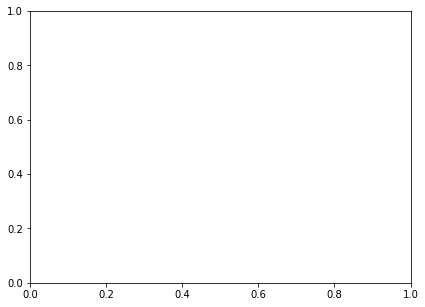